In [28]:
# ============================================================
# Langkah 1: Import Required Libraries
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [29]:
# ============================================================
# Langkah 2: Memuat dan Memeriksa Data
# ============================================================
df = pd.read_csv('dataset/Mall_Customers.csv')

df.head()
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
# ============================================================
# Langkah 3: Data Cleaning and Preprocessing
# ============================================================

# Menghapus kolom non-numerik & tidak relevan (CustomerID & Genre)
X = df.drop(columns=['CustomerID', 'Genre'])

# Mengisi missing value dengan mean untuk memastikan tidak ada NaN
X_filled = X.fillna(X.mean())

# Mengecek apakah masih ada missing value
print(X_filled.isnull().sum())


Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [32]:
# ============================================================
# Langkah 4: Feature Scaling
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


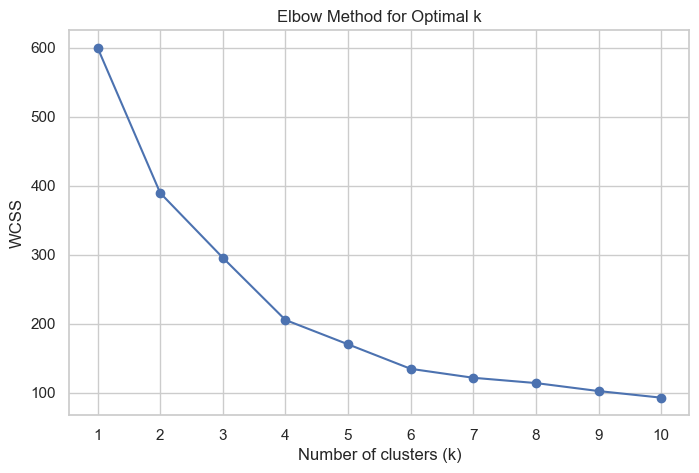

In [38]:
# ============================================================
# Langkah 5: Finding Optimal Number of Clusters (Elbow Method)
# ============================================================
WCSS = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, WCSS, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [39]:
# ============================================================
# Langkah 6: KMeans Clustering
# ============================================================
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


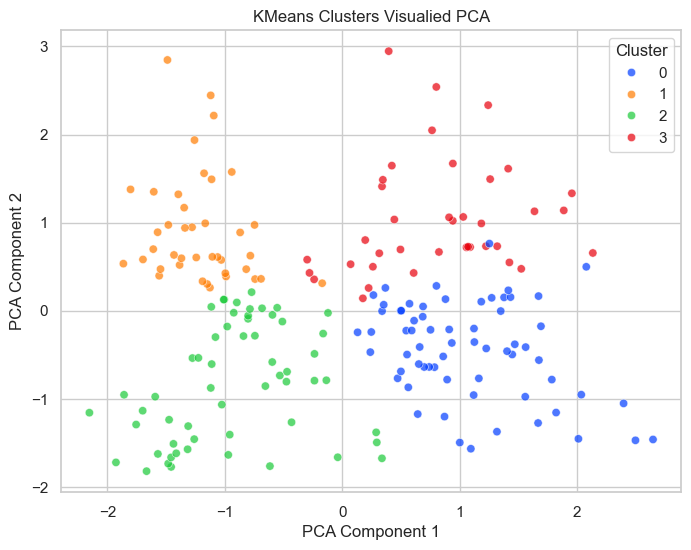

In [40]:
# ============================================================
# Langkah 7: Cluster Visualization (PCA 2D Plot)
# ============================================================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
palette = sns.color_palette("bright", optimal_k)

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters,
    palette=palette,
    alpha=0.7
)
plt.title('KMeans Clusters Visualied PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


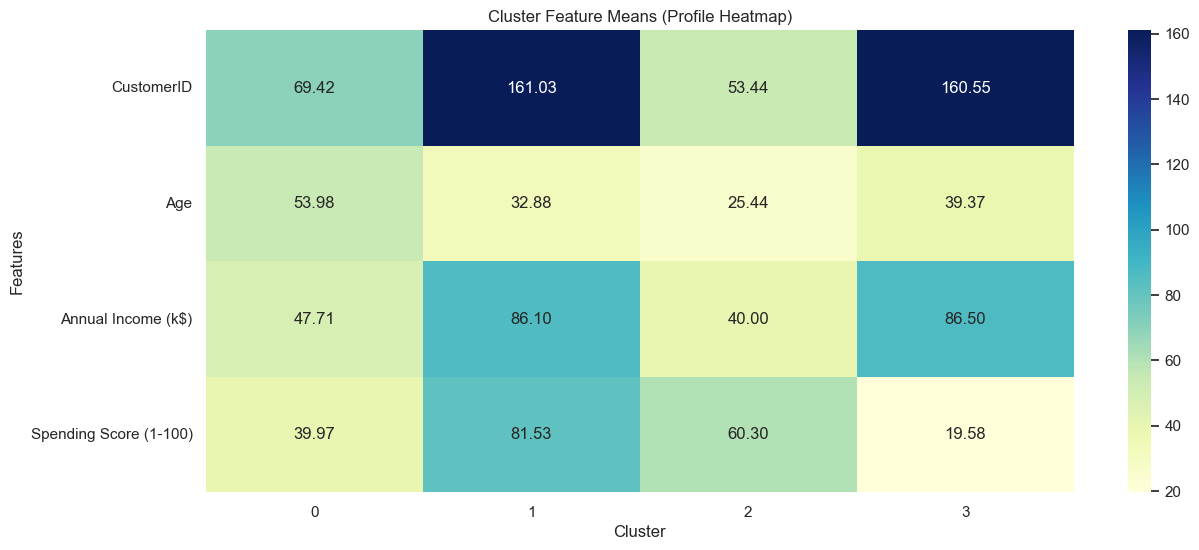

In [41]:
# ============================================================
# Langkah 8: Cluster Profiling and Analysis
# ============================================================
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_profile.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Cluster Feature Means (Profile Heatmap)')
plt.ylabel('Features')
plt.xlabel('Cluster')
plt.show()


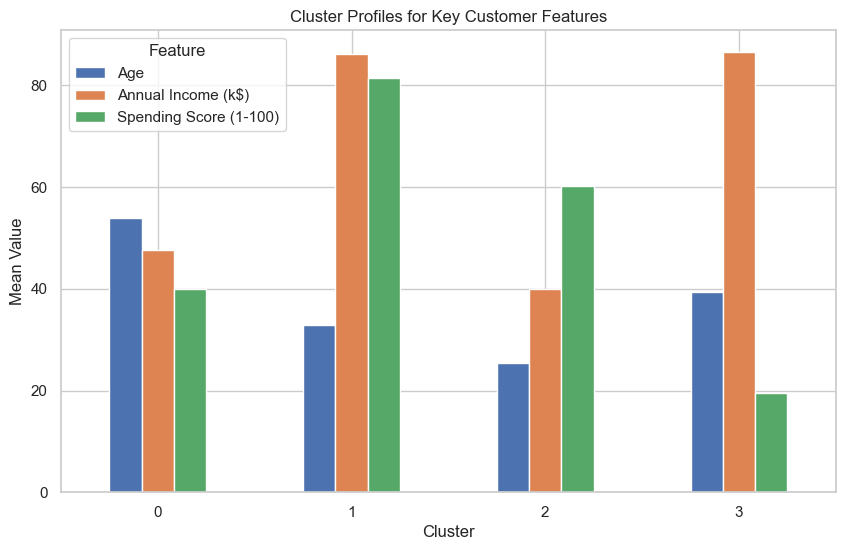

In [42]:
# Menggunakan fitur kunci sesuai dataset
key_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

cluster_profile[key_features].plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles for Key Customer Features')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.show()